# Bases of multivariate polynomials

Viviane Pons, Université Paris-Saclay

ICERM -- Feb 2021

*This work has been inspried by Alain Lascoux (1944 -- 2013)*

## Symmetric functions

In [1]:
Sym = SymmetricFunctions(QQ); Sym

Symmetric Functions over Rational Field

In [2]:
m = Sym.monomial(); m

Symmetric Functions over Rational Field in the monomial basis

In [3]:
m[2,1,1] # indexed by the partition [2,1,1]

m[2, 1, 1]

In [4]:
m[1,2] # does not work becase [1,2] is not a partition

ValueError: [1, 2] is not an element of Partitions

In [5]:
m[2,1,1].expand(3) # is a symmetric polynomial

x0^2*x1*x2 + x0*x1^2*x2 + x0*x1*x2^2

In [6]:
MultiRing = m[2,1,1].expand(3).parent();
MultiRing

Multivariate Polynomial Ring in x0, x1, x2 over Rational Field

In short, Symmetric functions bases can be seen as a vector spaces over the partitions.

But what if we want to see non symmetric polynomials as a vector space over compositions (ie. integer vectors) ?

Basically, we want to write

$m[2,1,1] = x[2,1,1] + x[1,2,1] + x[1,1,2]$

## The multivariate polynomials bases package

This is the goal of the Multipolynomial bases package. This is an [external Sage package](https://pypi.org/project/multipolynomial-bases/), which can be installed by typing

```sage -pip install multipolynomial_bases```

Then you can import all functionalities with

In [7]:
from multipolynomial_bases import *

I create the multipolynomial algebra over a certain alphabet $x$ this way

In [8]:
A.<x> = MultivariatePolynomialAlgebra(QQ); A

The Multivariate polynomial algebra on x over Rational Field

Then $x$ is the equivalent of the monomial basis for non symmetric polynomials.

In [9]:
pol = x[2,1,1] + x[1,2,1] + x[1,1,2]; pol

x[1, 1, 2] + x[1, 2, 1] + x[2, 1, 1]

In [10]:
alphabet = var('x0,x1,x2')
pol.to_expr(alphabet)

x0^2*x1*x2 + x0*x1^2*x2 + x0*x1*x2^2

In [11]:
MultiRing(pol.to_expr(alphabet)) == m[2,1,1].expand(3)

True

## Operators on polynomials

This representation of polynomials is useful for: **defining operators that act on the exponents**.

We define the action of the $s_i$ operator on integer vectors this way

$v.s_i = [v_1, \dots, v_{i+1}, v_i, \dots, v_n]$

$s_1, s_2, \dots, s_n$ are the generators of the Symmetric group. This defines an action on the polynomial

In [12]:
pol = x[2,1,1]; pol

x[2, 1, 1]

In [13]:
pol.si(1) # exchanges x1 and x2

x[1, 2, 1]

In [14]:
pol.si(2) # exchanges x2 and x3

x[2, 1, 1]

In [15]:
pol.si(3) # exchanges x3 and x4

x[2, 1, 0, 1]

Using the $s_i$ operators, we get the divided differences operators

$$f \partial_i = \frac{f - f^{s_i}}{x_i - x_{i+1}}$$

In [16]:
x[2,1,1].divided_difference(1)

x[1, 1, 1]

Indeed,

$$\frac{x_0^2 x_1 x_2 - x_0 x_1^2 x_2}{x_1 - x_0} = x_0 x_1 x_2 \frac{x_0 - x_1}{x_0 - x_1} = x_0 x_1 x_2$$

In [17]:
x[5,1].divided_difference(1)

x[1, 4] + x[2, 3] + x[3, 2] + x[4, 1]

If $v_i > v_{i+1}$

$$x^v\partial_i = \sum_{k=v_{i+1}}^{v_{i}-1} x^{[\dots, k, v_i-k,\dots]}$$

We can also define some slightly different operators. The isobaric divided difference $\pi_i$ is defined by

$$f \pi_i :=\frac{x_i f - x_{i+1}f^{s_i}}{x_i - x_{i+1}} = (fx_i)\partial_i $$



In [18]:
x[5,1].isobaric_divided_difference(1)

x[1, 5] + x[2, 4] + x[3, 3] + x[4, 2] + x[5, 1]

The $\partial_i$ and $\pi_i$ operators symmetrise the polynominal in $x_i$ and $x_{i+1}$.

In [19]:
pol = x[1,4,2]; pol

x[1, 4, 2]

In [20]:
pold1 = pol.divided_difference(1); pold1

-x[1, 3, 2] - x[2, 2, 2] - x[3, 1, 2]

In [21]:
pold1.si(1) == pold1

True

In [22]:
pold12 = pold1.divided_difference(2); pold12

-x[1, 2, 2] + x[3, 1, 1]

In [23]:
pold12.si(2) == pold12

True

In [24]:
pold121 = pold12.divided_difference(1); pold121

x[1, 1, 2] + x[1, 2, 1] + x[2, 1, 1]

In [25]:
pold121.si(1) == pold121

True

In [26]:
pold121.si(2) == pold121

True

We have applied the *maximal divided difference*.

$321 = s_1 s_2 s_1$ in the symmetric group

$\partial_{(321)} = \partial_1 \partial_2 \partial_1$

We obtain a symmetric function, and more precisely a *Schur function*.

In [27]:
schur = Sym.schur()
s = schur[2,1,1]
s

s[2, 1, 1]

In [28]:
s.expand(3)

x0^2*x1*x2 + x0*x1^2*x2 + x0*x1*x2^2

In [29]:
pold121.to_expr(alphabet)

x0^2*x1*x2 + x0*x1^2*x2 + x0*x1*x2^2

## Schubert polynomials

Schur functions are fundamental in the symmetric functions theory. They are a basis of the ring of symmetric functions. 

Now, how can we use divided differences to create a generalization of this basis for *non symmetric* polynomials.

Let us define dominant polynomials by: $x^\lambda$ with $\lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_n$ and let us apply divided differences on these polynomials.

In [30]:
dominant = x[4,2,1]
Y231 = dominant.divided_difference(1)
Y212 = Y231.divided_difference(2)
Y112 = Y212.divided_difference(1)
Y411 = dominant.divided_difference(2)
Y131 = Y411.divided_difference(1)
pols = [dominant, Y231, Y411, Y212, Y131, Y112]

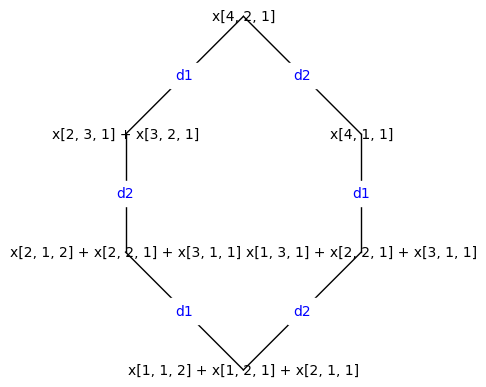

In [31]:
G = Graph()
for pol in pols:
    G.add_vertex(pol)
G.add_edge(pols[0], pols[1], 'd1')
G.add_edge(pols[1], pols[3], 'd2')
G.add_edge(pols[3], pols[5], 'd1')
G.add_edge(pols[0], pols[2], 'd2')
G.add_edge(pols[2], pols[4], 'd1')
G.add_edge(pols[4], pols[5], 'd2')
pos = {}
pos[pols[0]] = (1,3)
pos[pols[1]] = (0,2)
pos[pols[2]] = (2,2)
pos[pols[3]] = (0,1)
pos[pols[4]] = (2,1)
pos[pols[5]] = (1,0)
G.plot(pos = pos, edge_labels=True, vertex_size = 0)

Each polynomial of the graph is given by the dominant polynomial and a product of divided differences. This information can be coded in a single vector, and we obtain the **Schubert polynomials**

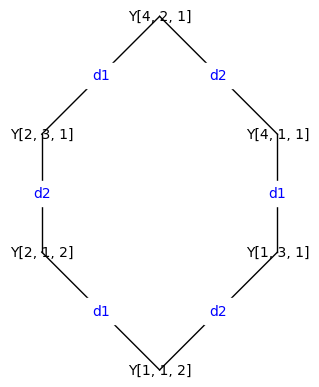

In [32]:
Y = A.schubert_basis()
pols = [Y(pol) for pol in pols]
G = Graph()
for pol in pols:
    G.add_vertex(pol)
G.add_edge(pols[0], pols[1], 'd1')
G.add_edge(pols[1], pols[3], 'd2')
G.add_edge(pols[3], pols[5], 'd1')
G.add_edge(pols[0], pols[2], 'd2')
G.add_edge(pols[2], pols[4], 'd1')
G.add_edge(pols[4], pols[5], 'd2')
pos = {}
pos[pols[0]] = (1,3)
pos[pols[1]] = (0,2)
pos[pols[2]] = (2,2)
pos[pols[3]] = (0,1)
pos[pols[4]] = (2,1)
pos[pols[5]] = (1,0)
G.plot(pos = pos, edge_labels=True, vertex_size = 0)

The definition goes like this:

If $\lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_n$, then

$$Y_\lambda = x^\lambda$$

Otherwise, if $v_i \gt v_{i+1}$, we get

$$Y_{\dots, v_{i+1},v_{i}-1, \dots} = Y_v \partial_i$$

This is a consistent definition because $\partial_i$ operators satisfy braid relations

$\partial_i \partial_{i+1} \partial_i = \partial_{i+1} \partial_i \partial_{i+1}$

In particular

$$f \partial_1 \partial_2 \partial_1 = \frac{f - f^{s_1} - f^{s_2} + f^{s_1 s_2} + f^{s_2 s_1} - f^{s_1 s_2 s_1}}{(x_1 - x_2) (x_1 - x_3) (x_2 - x_3)}$$

The family $(Y_v)$ forms a basis of multivariate polynomial, they are called the **Schubert polynomials** (Lascoux and Schutzenberger, 1983)


In [33]:
Y

The Multivariate polynomial algebra on x over Rational Field on the Schubert basis of type A

As this is a basis, one can convert the monomial from and to the Schubert basis.

In [34]:
schub = Y[1,1,2]; schub

Y[1, 1, 2]

In [35]:
x(schub)

x[1, 1, 2] + x[1, 2, 1] + x[2, 1, 1]

In [36]:
x(Y[2,1,2])

x[2, 1, 2] + x[2, 2, 1] + x[3, 1, 1]

In [37]:
pol = A.an_element(); pol

x[0, 0, 0] + 3*x[0, 1, 0] + 2*x[1, 0, 0] + x[1, 2, 3]

In [38]:
Y(pol)

Y[0, 0, 0] + 3*Y[0, 1, 0] - Y[1, 0, 0] + Y[1, 2, 3] - Y[1, 3, 2] - Y[2, 1, 3] + Y[2, 3, 1] + Y[3, 1, 2] - Y[3, 2, 1] + Y[4, 1, 1]

In particular, we can use the program to **multiply** Schubert polynomials

In [39]:
Y[2,1,2] * Y[2,1,2]

Y[4, 2, 4] + Y[4, 3, 3] + Y[5, 2, 3] + Y[6, 2, 2]

Schubert polynomials appear in particular in algebraic geometry (representing cohomology classes of Schubert cycles in flag varieties). The question of a combinatorial description of the product is still open. 

The closest we have is an analogue of the Pieri's formula called the **Monk formula**

$$Y_{(s_r)} Y_{(\sigma)} = \sum_{i \leq r < j} Y_{(\sigma t_{ij})}$$

where $t_{ij}$ is a transposition which increases the length of $\sigma$ by exactly 1. Here, Schubert polynomials are indexed by the permutation applied to the dominant element $x^{[n-1, n-2, \dots, 1, 0]}$. $Y_{(\sigma)} = Y_v$ where $v$ is the *Lehmer code* of the permutation $\sigma$. In our settings, this corresponds to 

$$Y_{[0,0,\dots, 1]} Y_v$$

In [40]:
Y[0,0,1] * Y[3,0,0,2,1,0]

Y[3, 0, 1, 2, 1, 0] + Y[3, 0, 2, 2, 0, 0] + Y[3, 0, 3, 0, 1, 0] + Y[4, 0, 0, 2, 1, 0] + Y[5, 0, 0, 1, 1, 0]

In [41]:
s3 = Permutation([1,2,4,3,5,6])
sigma = Permutation([4,1,2,6,5,3])
Y(s3.to_lehmer_code()) * Y(sigma.to_lehmer_code())

Y[3, 0, 1, 2, 1, 0] + Y[3, 0, 2, 2, 0, 0] + Y[3, 0, 3, 0, 1, 0] + Y[4, 0, 0, 2, 1, 0] + Y[5, 0, 0, 1, 1, 0]

In [42]:
def monk(r, sigma):
    s = 0
    n = len(sigma) + 1
    sigma = sigma[:] + [n]
    for i in range(r):
        for j in range(r,n):
            if sigma[i] < sigma[j] and all(sigma[k] < sigma[i] or sigma[k] > sigma[j] for k in range(i+1,j)):
                p2 = Permutation(sigma[:i] + [sigma[j]] + sigma[i+1:j] + [sigma[i]] + sigma[j+1:])
                s += Y(p2.to_lehmer_code())
    return s.reduce_nb_variables()

In [43]:
monk(3, Permutation([4,1,2,6,5,3]))

Y[3, 0, 1, 2, 1] + Y[3, 0, 2, 2, 0] + Y[3, 0, 3, 0, 1] + Y[4, 0, 0, 2, 1] + Y[5, 0, 0, 1, 1]

In [44]:
monk(3, Permutation([4,1,2,6,5,3])) == Y[0,0,1] * Y[3,0,0,2,1,0]

True

In [45]:
n = 6
all(monk(r, sigma) == Y([0] * (r-1) + [1]) * Y(sigma.to_lehmer_code()) 
    for sigma in Permutations(n) 
    for r in range(1,n))

True

## Other bases

We have seen that there exists some other operators: $\pi_i$. They define other bases.

**Key polynomials** (Demazure characters):

If $\lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_n$, then

$$K_\lambda = x^\lambda$$

Otherwise, if $v_i \gt v_{i+1}$, we get

$$K_{\dots, v_{i+1},v_{i}, \dots} = K_v \pi_i$$

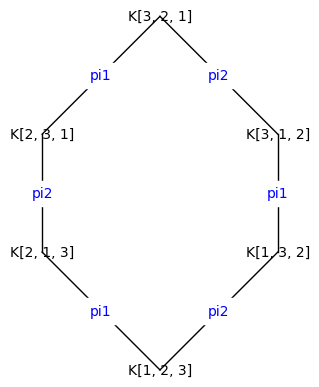

In [46]:
dominant = x[3,2,1]
K231 = dominant.isobaric_divided_difference(1)
K213 = K231.isobaric_divided_difference(2)
K123 = K213.isobaric_divided_difference(1)
K312 = dominant.isobaric_divided_difference(2)
K132 = K312.isobaric_divided_difference(1)
pols = [dominant, K231, K312, K213, K132, K123]
K = A.demazure_basis()
pols = [K(pol) for pol in pols]

G = Graph()
for pol in pols:
    G.add_vertex(pol)
G.add_edge(pols[0], pols[1], 'pi1')
G.add_edge(pols[1], pols[3], 'pi2')
G.add_edge(pols[3], pols[5], 'pi1')
G.add_edge(pols[0], pols[2], 'pi2')
G.add_edge(pols[2], pols[4], 'pi1')
G.add_edge(pols[4], pols[5], 'pi2')
pos = {}
pos[pols[0]] = (1,3)
pos[pols[1]] = (0,2)
pos[pols[2]] = (2,2)
pos[pols[3]] = (0,1)
pos[pols[4]] = (2,1)
pos[pols[5]] = (1,0)
G.plot(pos = pos, edge_labels=True, vertex_size = 0)


In [47]:
schur[3,2,1].expand(3)

x0^3*x1^2*x2 + x0^2*x1^3*x2 + x0^3*x1*x2^2 + 2*x0^2*x1^2*x2^2 + x0*x1^3*x2^2 + x0^2*x1*x2^3 + x0*x1^2*x2^3

In [48]:
K123.to_expr(alphabet)

x0^3*x1^2*x2 + x0^2*x1^3*x2 + x0^3*x1*x2^2 + 2*x0^2*x1^2*x2^2 + x0*x1^3*x2^2 + x0^2*x1*x2^3 + x0*x1^2*x2^3

**Grothendieck polynomials**

If $\lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_n$, then

$$G_\lambda = x^\lambda$$

Otherwise, if $v_i \gt v_{i+1}$, we get

$$G_{\dots, v_{i+1},v_{i} - 1, \dots} = \left(G_v \frac{1 - x_{i+1}}{x_i} \right)  \pi_i$$

The operator $\frac{1 - x_{i+1}}{x_i} \pi_i$ is not defined by default, but we can create it

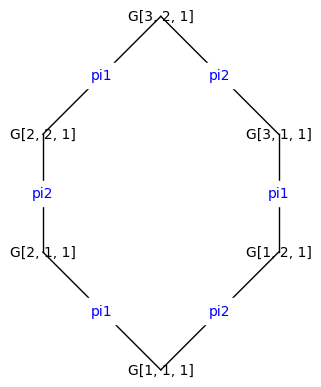

In [49]:
Gr = A.grothendieck_positive_basis()
dominant = Gr[3,2,1]
G221 = Gr[2,2,1]
G211 = Gr[2,1,1]
G111 = Gr[1,1,1]
G311 = Gr[3,1,1]
G121 = Gr[1,2,1]
pols = [dominant, G221, G311, G211, G121, G111]
G = Graph()
for pol in pols:
    G.add_vertex(pol)
G.add_edge(pols[0], pols[1], 'pi1')
G.add_edge(pols[1], pols[3], 'pi2')
G.add_edge(pols[3], pols[5], 'pi1')
G.add_edge(pols[0], pols[2], 'pi2')
G.add_edge(pols[2], pols[4], 'pi1')
G.add_edge(pols[4], pols[5], 'pi2')
pos = {}
pos[pols[0]] = (1,3)
pos[pols[1]] = (0,2)
pos[pols[2]] = (2,2)
pos[pols[3]] = (0,1)
pos[pols[4]] = (2,1)
pos[pols[5]] = (1,0)
G.plot(pos = pos, edge_labels=True, vertex_size = 0)

In [50]:
schur[1,1,1].expand(3)

x0*x1*x2

In [51]:
G111.to_expr(alphabet)

x0*x1*x2

We can multiply and convert back and from all these bases.

In [52]:
pol = A.an_element(); pol

x[0, 0, 0] + 3*x[0, 1, 0] + 2*x[1, 0, 0] + x[1, 2, 3]

In [53]:
Gr(pol)

G[0, 0, 0] + 3*G[0, 1, 0] - G[1, 0, 0] + 3*G[1, 1, 0] + G[1, 2, 3] - G[1, 3, 2] + G[1, 3, 3] - G[2, 1, 3] + G[2, 2, 3] + G[2, 3, 1] - 2*G[2, 3, 2] + G[2, 3, 3] + G[3, 1, 2] - G[3, 1, 3] - G[3, 2, 1] + G[3, 2, 2] - G[3, 3, 2] + G[3, 3, 3] + G[4, 1, 1] - G[4, 1, 3]

In [54]:
K[1,2,3] * K[1,3,3]

K[2, 5, 6] + K[3, 4, 6] + K[3, 5, 5] + K[4, 4, 5]

In [55]:
K(x[1,2,3])

K[1, 2, 3] - K[1, 3, 2] - K[2, 1, 3] + K[2, 3, 1] + K[3, 1, 2] - K[3, 2, 1]

In [56]:
Y(K[2,1,2,4])

Y[2, 1, 2, 4] - Y[3, 1, 1, 4] + Y[6, 1, 1, 1]

In [57]:
Gr[1,2,3] * Gr[1,3,3]

G[2, 5, 6] + G[3, 4, 6] + G[3, 5, 5] - 2*G[3, 5, 6] + G[4, 4, 5] - G[4, 4, 6] - G[4, 5, 5] + G[4, 5, 6]

In [58]:
Gr(x[1,2,3])

G[1, 2, 3] - G[1, 3, 2] + G[1, 3, 3] - G[2, 1, 3] + G[2, 2, 3] + G[2, 3, 1] - 2*G[2, 3, 2] + G[2, 3, 3] + G[3, 1, 2] - G[3, 1, 3] - G[3, 2, 1] + G[3, 2, 2] - G[3, 3, 2] + G[3, 3, 3] + G[4, 1, 1] - G[4, 1, 3]

For example,

we can check an equivalent of the Monk formula for Grothendieck polynomials, which is found here

* C. Lenart and A. Postnikov, Affine Weyl groups in K-theory and representation
theory, *Internat. Math. Res. Not.* 2007
* V. Pons, Interval structure of the Pieri formula for Grothendieck polynomials. *International Journal of Algebra and Computation*, 23(01):123–146, 2013. 

In [59]:
def chained_permutations(sigma, chain):
    if len(chain) == 0:
        return Gr(Permutation(sigma).to_lehmer_code())
    i,j = chain.pop()
    s = chained_permutations(sigma, chain)
    if sigma[i] < sigma[j] and all(sigma[k] < sigma[i] or sigma[k] > sigma[j] for k in range(i+1,j)):
        sigma2 = sigma[:i] + [sigma[j]] + sigma[i+1:j] + [sigma[i]] + sigma[j+1:]
        s -= chained_permutations(sigma2,chain)
    chain.append((i,j))
    return s

def pieri_groth(r, sigma):
    chain = []
    n = len(sigma)
    for i in range(r):
        for j in range(n-1,r-1,-1):
            if sigma[i] < sigma[j] and all(sigma[k] < sigma[i] or sigma[k] > sigma[j] for k in range(i+1,j)):
                chain.append((i,j))
    chain.reverse()
    return Gr(sigma.to_lehmer_code()) - chained_permutations(sigma, chain)

In [60]:
r = 4
sigma = Permutation([1,3,6,2,5,4])
pieri_groth(4,sigma)

G[0, 1, 3, 1, 1, 0] + G[0, 1, 3, 2, 0, 0] - G[0, 1, 3, 2, 1, 0] + G[0, 2, 3, 0, 1, 0] - G[0, 2, 3, 1, 1, 0] - G[0, 2, 3, 2, 0, 0] + G[0, 2, 3, 2, 1, 0] + G[0, 3, 3, 0, 0, 0] - G[0, 3, 3, 0, 1, 0] - G[0, 3, 3, 1, 0, 0] + G[0, 3, 3, 1, 1, 0] + G[0, 3, 3, 2, 0, 0] - G[0, 3, 3, 2, 1, 0]

In [61]:
pol = Gr(sigma.to_lehmer_code()) * Gr[0,0,0,1]; pol
pol

G[0, 1, 3, 1, 1, 0] + G[0, 1, 3, 2, 0, 0] - G[0, 1, 3, 2, 1, 0] + G[0, 1, 4, 0, 1, 0] - G[0, 1, 4, 1, 1, 0] - G[0, 1, 4, 2, 0, 0] + G[0, 1, 4, 2, 1, 0] + G[0, 2, 3, 0, 1, 0] - G[0, 2, 3, 1, 1, 0] - G[0, 2, 3, 2, 0, 0] + G[0, 2, 3, 2, 1, 0] - G[0, 2, 4, 0, 1, 0] + G[0, 2, 4, 1, 1, 0] + G[0, 2, 4, 2, 0, 0] - G[0, 2, 4, 2, 1, 0] + G[0, 3, 3, 0, 0, 0] - G[0, 3, 3, 0, 1, 0] - G[0, 3, 3, 1, 0, 0] + G[0, 3, 3, 1, 1, 0] + G[0, 3, 3, 2, 0, 0] - G[0, 3, 3, 2, 1, 0] - G[0, 3, 4, 0, 0, 0] + G[0, 3, 4, 0, 1, 0] + G[0, 3, 4, 1, 0, 0] - G[0, 3, 4, 1, 1, 0] - G[0, 3, 4, 2, 0, 0] + G[0, 3, 4, 2, 1, 0]

In [62]:
def reduce(self, key):
    """
    Removes the lehmer code which correspond to permutations in S_m m > n
    """
    n = len(key) - 1
    for k in key:
        if k > n:
            return self._module(0)
        n-= 1
    return self._module(key)
Gr.add_operator("reduce", reduce)

In [63]:
pol.apply_morphism(1, method="reduce")

G[0, 1, 3, 1, 1, 0] + G[0, 1, 3, 2, 0, 0] - G[0, 1, 3, 2, 1, 0] + G[0, 2, 3, 0, 1, 0] - G[0, 2, 3, 1, 1, 0] - G[0, 2, 3, 2, 0, 0] + G[0, 2, 3, 2, 1, 0] + G[0, 3, 3, 0, 0, 0] - G[0, 3, 3, 0, 1, 0] - G[0, 3, 3, 1, 0, 0] + G[0, 3, 3, 1, 1, 0] + G[0, 3, 3, 2, 0, 0] - G[0, 3, 3, 2, 1, 0]

In [64]:
pol.apply_morphism(1, method="reduce") == pieri_groth(4,sigma)

True

In [65]:
n = 5
all(pieri_groth(r, sigma) == (Gr([0] * (r-1) + [1]) * Gr(sigma.to_lehmer_code())).apply_morphism(1, method = "reduce") 
    for sigma in Permutations(n) 
    for r in range(1,n))

True

## Other types

The divided differences exist also in other types. The program supports types B,C,D. In particular, we have Key polynomials of types $B$ and $D$.

In [66]:
Kb = A.demazure_basis(group_type="B"); Kb

The Multivariate polynomial algebra on x over Rational Field on the Demazure basis of type B

In [67]:
x(Kb[1,1,-2])

x[1, 1, -2] + x[1, 1, -1] + x[1, 1, 0] + x[1, 1, 1] + x[1, 1, 2] + x[1, 2, -1] + x[1, 2, 0] + x[1, 2, 1] + x[2, 1, -1] + x[2, 1, 0] + x[2, 1, 1]

In [68]:
Kb[-1,2,3] * Kb[2,3,-4]

K[1, 5, -1] + K[1, 5, 2] + K[1, 5, 3] + K[1, 5, 4] + K[1, 5, 5] + K[1, 5, 6] + K[1, 5, 7] + K[1, 6, -2] + K[1, 6, 0] + K[1, 6, 1] + K[1, 6, 2] + 2*K[1, 6, 3] + 2*K[1, 6, 4] + K[1, 6, 5] + K[1, 6, 6] + K[1, 7, -1] + K[1, 7, 2] + K[1, 7, 3] + K[1, 7, 4] + K[2, 4, -1] + K[2, 4, 2] + K[2, 4, 3] + K[2, 4, 4] + K[2, 4, 5] + K[2, 4, 6] + K[2, 4, 7] + 2*K[2, 5, -2] + K[2, 5, -1] + 2*K[2, 5, 0] + K[2, 5, 1] + 2*K[2, 5, 2] + 4*K[2, 5, 3] + 3*K[2, 5, 4] + 3*K[2, 5, 5] + 3*K[2, 5, 6] + K[2, 5, 7] + K[2, 6, -3] + K[2, 6, -2] + 2*K[2, 6, -1] + K[2, 6, 0] + K[2, 6, 1] + 3*K[2, 6, 2] + 4*K[2, 6, 3] + 4*K[2, 6, 4] + K[2, 6, 5] + K[2, 6, 6] + K[2, 7, -2] + K[2, 7, -1] + K[2, 7, 0] + K[2, 7, 2] + 2*K[2, 7, 3] + K[2, 7, 4] + K[3, 4, -2] + K[3, 4, -1] + K[3, 4, 0] + K[3, 4, 1] + K[3, 4, 2] + 2*K[3, 4, 3] + 2*K[3, 4, 4] + 2*K[3, 4, 5] + 2*K[3, 4, 6] + K[3, 4, 7] + 2*K[3, 5, -3] + 2*K[3, 5, -2] + 4*K[3, 5, -1] + 2*K[3, 5, 0] + 2*K[3, 5, 1] + 2*K[3, 5, 2] + 4*K[3, 5, 3] + 4*K[3, 5, 4] + 4*K[3, 5, 5] + 3*K[3, 

## Current state of the project

I developed this project almost 10 years ago but it was never fully finished. I have conducted improvements and maintenance but my research has lead me elsewhere: **I am not using this project anymore**.

It now has basic documentation (which could be improved a lot) and tests. It is functional on the latest Sage version and I have setup automatic tests every months so that I know if it breaks.

In [72]:
Y[3,4,1,4,2,3,2]**2

Y[6, 8, 2, 8, 4, 6, 4] + Y[6, 8, 2, 8, 5, 5, 4] + Y[6, 8, 3, 7, 4, 6, 4] + Y[6, 8, 3, 7, 5, 5, 4] + Y[6, 8, 3, 8, 3, 6, 4] + 2*Y[6, 8, 3, 8, 4, 5, 4] + Y[6, 8, 3, 8, 5, 5, 3] + Y[6, 8, 4, 6, 4, 6, 4] + Y[6, 8, 4, 6, 5, 5, 4] + Y[6, 8, 4, 7, 3, 6, 4] + Y[6, 8, 4, 7, 4, 5, 4] + Y[6, 8, 4, 7, 5, 5, 3] + Y[6, 8, 4, 8, 4, 4, 4] + Y[6, 8, 5, 5, 4, 6, 4] + Y[6, 8, 5, 5, 5, 5, 4] + 2*Y[6, 8, 5, 6, 3, 6, 4] + Y[6, 8, 5, 6, 4, 5, 4] + 2*Y[6, 8, 5, 6, 5, 5, 3] + Y[6, 8, 5, 7, 2, 6, 4] + Y[6, 8, 5, 7, 5, 5, 2] + Y[6, 8, 6, 6, 2, 6, 4] + Y[6, 8, 6, 6, 3, 5, 4] + Y[6, 8, 6, 6, 3, 6, 3] + Y[6, 8, 6, 6, 4, 5, 3] + Y[6, 8, 6, 6, 5, 5, 2] + Y[6, 9, 2, 7, 4, 6, 4] + Y[6, 9, 2, 7, 5, 5, 4] + 2*Y[6, 9, 2, 8, 4, 5, 4] + 2*Y[6, 9, 3, 6, 4, 6, 4] + 2*Y[6, 9, 3, 6, 5, 5, 4] + Y[6, 9, 3, 7, 3, 6, 4] + 2*Y[6, 9, 3, 7, 4, 5, 4] + Y[6, 9, 3, 7, 5, 5, 3] + 2*Y[6, 9, 3, 8, 3, 5, 4] + 2*Y[6, 9, 3, 8, 4, 4, 4] + 2*Y[6, 9, 4, 5, 4, 6, 4] + 2*Y[6, 9, 4, 5, 5, 5, 4] + 2*Y[6, 9, 4, 6, 3, 6, 4] + 3*Y[6, 9, 4, 6, 4, 5, 4] +